In [2]:
# modules
import os
#import pyproj
import fnmatch
import matplotlib
import numpy as np
import xarray as xr
import geopandas as gpd
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from geocube.api.core import make_geocube
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray
%matplotlib inline

In [3]:
# Store the name of the 'active' file in a variable
controlFile = 'control_Yukon_Merit.txt'

In [4]:
# Easy access to control file folder
controlFolder = Path('../0_control_files')

In [5]:
# Function to extract a given setting from the control file
def read_from_control( file, setting ):
    
    # Open 'control_active.txt' and ...
    with open(file) as contents:
        for line in contents:
            
            # ... find the line with the requested setting
            if setting in line and not line.startswith('#'):
                break
    
    # Extract the setting's value
    substring = line.split('|',1)[1]      # Remove the setting's name (split into 2 based on '|', keep only 2nd part)
    substring = substring.split('#',1)[0] # Remove comments, does nothing if no '#' is found
    substring = substring.strip()         # Remove leading and trailing whitespace, tabs, newlines
       
    # Return this value    
    return substring

In [6]:
# mizuRoute simulations
mizu_output_path = Path('/Users/darrieythorsson/compHydro/data/CWARHM_data/domain_Yukon/simulations/run_Yukon_Merit/mizuRoute')
mizu_output_name = 'run_Yukon_Merit.h.2005-12-01-00000.nc'

In [7]:
# SUMMA simulations
summa_output_path = Path('/Users/darrieythorsson/compHydro/data/CWARHM_data/domain_Yukon/simulations/run_Yukon_Merit/SUMMA')
summa_output_name = 'run_Yukon_Merit_day.nc'

## Get list of snow observation sites

In [8]:
flow_list_path = '/Users/darrieythorsson/compHydro/data/CWARHM_data/domain_Yukon/observations/Yukon_Merit_basins_with_Qobs.csv'

In [9]:
ds_flow_list = pd.read_csv(flow_list_path)

In [10]:
# Get the aggregated statistics of mizuRoute simulations
mizu = xr.open_dataset(mizu_output_path/mizu_output_name)

                 agency   site_no tz_cd  1155_00060_00003 1155_00060_00003_cd
datetime                                                                     
1989-10-01 01:00   USGS  15514000  AKDT               996              A:[91]
1989-10-01 01:30   USGS  15514000  AKDT               996              A:[91]
1989-10-01 02:00   USGS  15514000  AKDT               996              A:[91]
1989-10-01 02:30   USGS  15514000  AKDT               996              A:[91]
1989-10-01 03:00   USGS  15514000  AKDT               989              A:[91]
...                 ...       ...   ...               ...                 ...
2022-12-31 22:45   USGS  15514000  AKST               619                 A:e
2023-01-01 10:45   USGS  15514000  AKST               618                 A:e
2023-01-01 22:45   USGS  15514000  AKST               616                 A:e
2023-01-02 10:45   USGS  15514000  AKST               614                 A:e
2023-01-02 22:45   USGS  15514000  AKST               613       

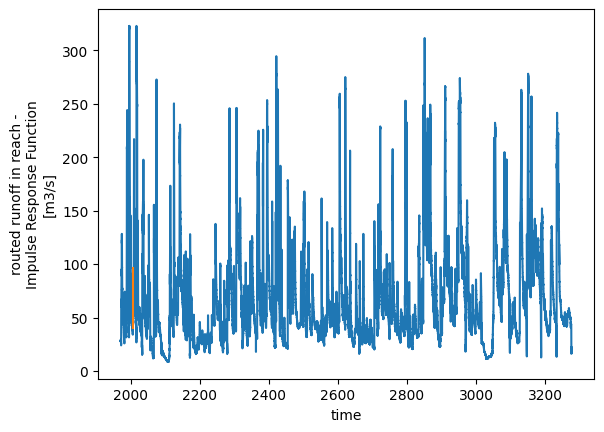

In [11]:
row = ds_flow_list.iloc[47]

basin = row['COMID']
station_id = row['StationNum']
reach = mizu.sel(seg = mizu['reachID'] == basin)
if row['Country'] == 'CAN':
    station_obs_path = '/Users/darrieythorsson/compHydro/data/CWARHM_data/domain_Yukon/observations/Streamflow/WSC2022_Stations/CAN_' + station_id + '/observations/CAN_' + station_id + '_iv_raw_flow_observations.csv'
    ds_station = pd.read_csv(station_obs_path, index_col = 'Date')
    ds_station.index = pd.to_datetime(ds_station.index)
    print(ds_station)
    

    reach['IRFroutedRunoff'].plot()
    
    ds_station['Value/Valeur'].plot()

elif row['Country'] == 'USA':
    station_name = row['SiteName']
    station_obs_path = '/Users/darrieythorsson/compHydro/data/CWARHM_data/domain_Yukon/observations/Streamflow/Alaska_Stations/' + station_name + '_iv.txt'
    ds_station = pd.read_csv(station_obs_path, skiprows = 35, delimiter = "\t", names = ['agency','site_no','datetime','tz_cd','1155_00060_00003','1155_00060_00003_cd'])
    ds_station = ds_station.set_index('datetime')
    
    print(ds_station)
    ds_station.iloc[:,3].multiply(0.028316832).plot()
    reach['IRFroutedRunoff'].plot()


In [12]:
for row in ds_snow_list.iterrows():
    print(row)

NameError: name 'ds_snow_list' is not defined